In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Further Cleanup: job_Skills to list datatype
df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

# **Scatter Plot: We need to get our final data in a dataframe of 3 columns:**
# 1. Index
# 2. x-axis
# 3. y-axis

In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [3]:
df_exploded = df.explode('job_skills')

In [7]:
df_exploded.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [22]:
skill_stats = (df_exploded
               .groupby('job_skills')
               .agg(
                    skill_count=('job_skills', 'count'),
                    median_salary=('salary_year_avg', 'median')
                    )
                )

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skills_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


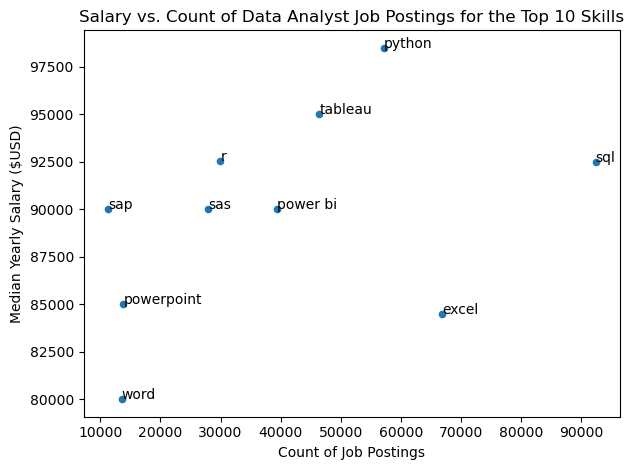

In [27]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Data Analyst Job Postings for the Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
    
plt.show()